## Linear Regression

In [1]:
import os
import json
import pandas as pd 
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline, AutoModel
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics
import math
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import shap

In [2]:
df = pd.read_csv('filtered_data_.csv')
df.drop(columns=["user_id", "review_id", "book_id"], inplace=True)
df = df.dropna(subset=['review_text'])
df = df[(df["rating"] != 0)] # remove reviews with no rating
df["review_text"] = df["review_text"].astype(str)
df

,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,type
0,4,Fun sequel to the original.,735919,735919,735079.8,735663.8,7,0,children
1,5,One of my favorite books to read to my 5 year ...,735545,736354,736353.0,735663.8,4,0,children
2,5,One of the best and most imaginative childrens...,735529,735529,735079.8,735663.8,6,1,children
3,5,My daughter is loving this. Published in the 6...,735204,736410,735079.8,735663.8,5,4,children
4,5,A friend sent me this. Hilarious!,734268,734531,734268.0,734268.0,5,0,children
...,...,...,...,...,...,...,...,...,...
39995,3,*3.5 stars*,735888,736092,735889.0,735888.0,26,2,young_adult
39996,3,Written in the Stars is actually a book I don'...,735792,736092,735793.0,735792.0,55,3,young_adult
39997,3,*2.5 stars* \n I originally rated this a 3.5 b...,735790,735827,735827.0,735819.0,25,7,young_adult
39998,3,*3.75 stars* \n I've never given that kind of ...,735778,735781,735781.0,735778.0,11,0,young_adult


(-0.5, 399.5, 199.5, -0.5)

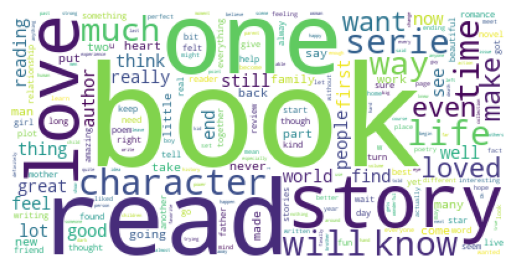

In [3]:
df5 = df[df.rating == 5]
text5 = ''
for line in df5.review_text:
    text5 += line + " "
wordcloud5 = WordCloud(background_color="white").generate(text5)
plt.imshow(wordcloud5)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

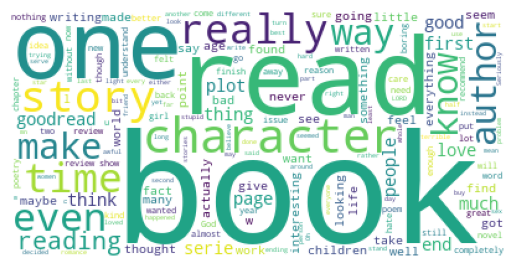

In [4]:
df1 = df[df.rating == 1]
text1 = ''
for line in df1.review_text:
    text1 += line + " "
wordcloud1 = WordCloud(background_color="white").generate(text1)
plt.imshow(wordcloud1)
plt.axis("off")

## Linear Regression

Mean Squared Error: 4.305091283106197
Root Mean Squared Error: 2.0748713895338664
R^2: -3.2797978861822275
Confusion Matrix:


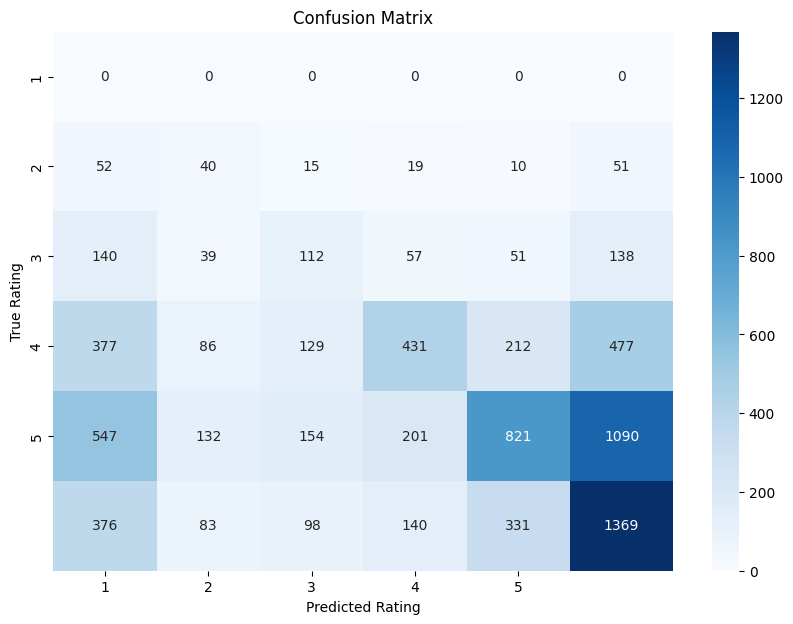

              precision    recall  f1-score      support
0              0.000000  0.000000  0.000000     0.000000
1              0.105263  0.213904  0.141093   187.000000
2              0.220472  0.208566  0.214354   537.000000
3              0.508255  0.251752  0.336719  1712.000000
4              0.576140  0.278778  0.375744  2945.000000
5              0.438080  0.571131  0.495835  2397.000000
accuracy       0.356518  0.356518  0.356518     0.356518
macro avg      0.308035  0.254022  0.260624  7778.000000
weighted avg   0.482775  0.356518  0.387379  7778.000000


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [5]:
#data preprocessing
df = pd.read_csv('filtered_data_.csv')
df.drop(columns=["user_id", "review_id", "book_id"], inplace=True)
df = df.dropna(subset=['review_text'])
df = df[(df["rating"] != 0)] # remove reviews with no rating
df["review_text"] = df["review_text"].astype(str)
df


df.loc[df['rating'] > 5, 'rating'] = 5
df.loc[df['rating'] < 0, 'rating'] = 0

X = df['review_text']
y = df['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_pred = np.clip(y_pred, 0, 5).round().astype(int)

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R^2:', metrics.r2_score(y_test, y_pred))

#confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.xlabel('Predicted Rating')
plt.ylabel('True Rating')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(y_test, y_pred, output_dict=True)
df_repo = pd.DataFrame(report).transpose()
print(df_repo)



In [6]:
#compare with real values
df = pd.DataFrame({'Real': y_test, 'Predicted': y_pred})
print(df)


       Real  Predicted
5342      2          4
12589     4          5
29345     4          2
14509     2          5
1431      3          3
...     ...        ...
33136     3          4
26593     4          0
1102      4          0
15034     5          5
29496     1          0

[7778 rows x 2 columns]


## Linear Regression with Ridge Regression and Grid Seacrh 

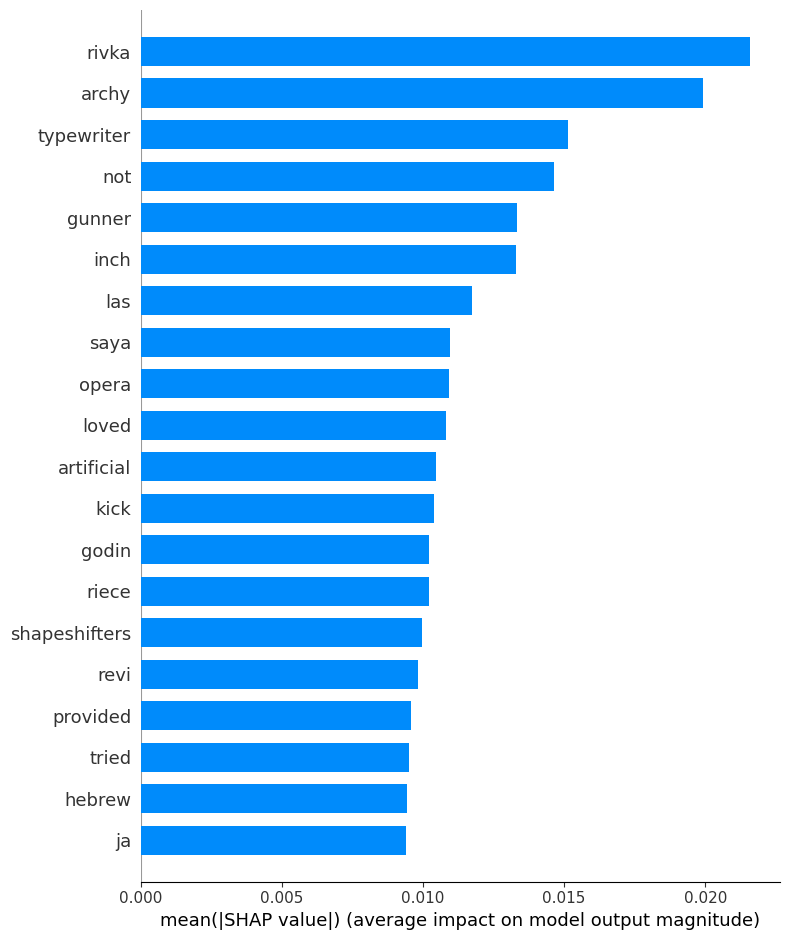

In [7]:

##Whit ridge regression and grid search

# Data preprocessing
df = pd.read_csv('filtered_data_.csv')
df.drop(columns=["user_id", "review_id", "book_id"], inplace=True)
df = df.dropna(subset=['review_text'])
df = df[(df["rating"] != 0)] # remove reviews with no rating
df["review_text"] = df["review_text"].astype(str)

df.loc[df['rating'] > 5, 'rating'] = 5
df.loc[df['rating'] < 0, 'rating'] = 0

# Split data into train and test sets
X = df['review_text']
y = df['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, feature_names=vectorizer.get_feature_names_out(), plot_type='bar')

# Use Ridge Regression with Grid Search for hyperparameter tuning
ridge = Ridge()
parameters = {'alpha': [0.1, 1.0, 10.0]}
grid_search = GridSearchCV(ridge, parameters, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)
y_pred = np.clip(y_pred, 0, 5).round().astype(int)


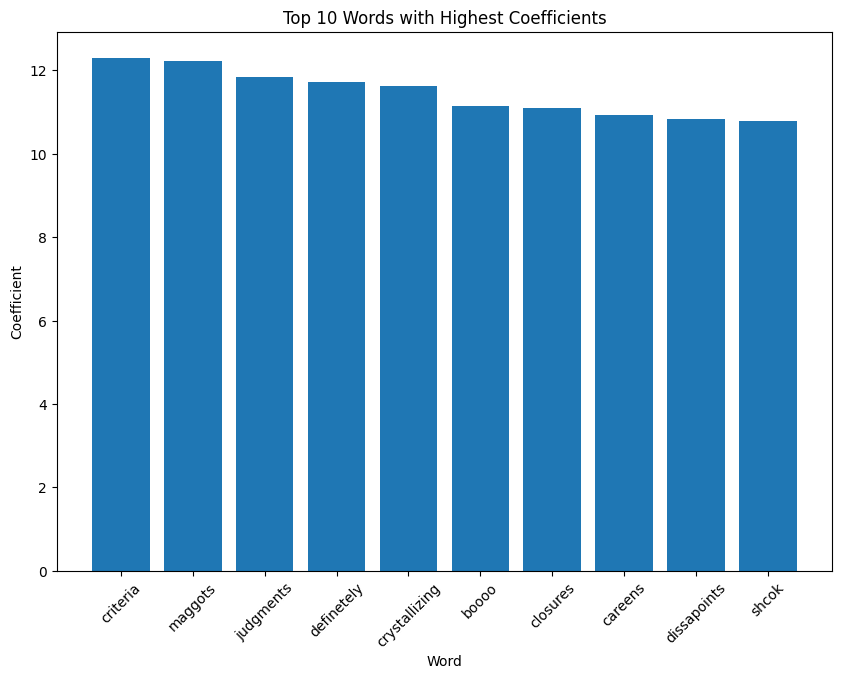

In [8]:
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_

coef_df = pd.DataFrame({'Word': feature_names, 'Coefficient': coefficients})

coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)


#plot 
plt.figure(figsize=(10, 7))
plt.bar(coef_df['Word'][:10], coef_df['Abs_Coefficient'][:10])
plt.xlabel('Word')
plt.ylabel('Coefficient')
plt.title('Top 10 Words with Highest Coefficients')
plt.xticks(rotation=45)
plt.show()


Mean Squared Error: 0.6788377474929288
Root Mean Squared Error: 0.8239161046447198
R^2: 0.3251505796911405
Confusion Matrix:


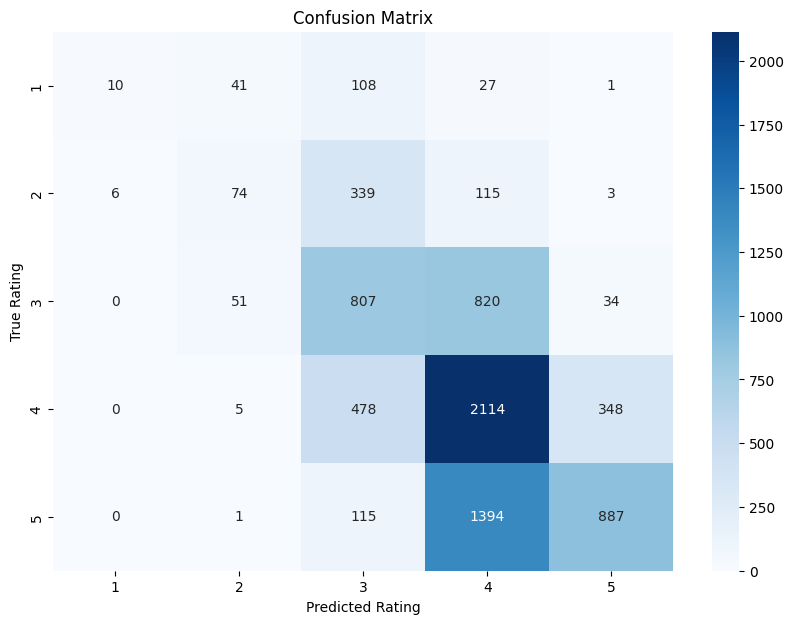

              precision    recall  f1-score      support
1              0.625000  0.053476  0.098522   187.000000
2              0.430233  0.137803  0.208745   537.000000
3              0.436925  0.471379  0.453498  1712.000000
4              0.472931  0.717827  0.570196  2945.000000
5              0.696779  0.370046  0.483379  2397.000000
accuracy       0.500386  0.500386  0.500386     0.500386
macro avg      0.532373  0.350106  0.362868  7778.000000
weighted avg   0.534699  0.500386  0.481460  7778.000000


In [9]:
# Evaluation
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

#confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.xlabel('Predicted Rating')
plt.ylabel('True Rating')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(y_test, y_pred, output_dict=True)
df_repo = pd.DataFrame(report).transpose()
print(df_repo)

In [10]:
# Compare with real values
df_results = pd.DataFrame({'Real': y_test, 'Predicted': y_pred})
print(df_results)

       Real  Predicted
5342      2          3
12589     4          5
29345     4          4
14509     2          3
1431      3          3
...     ...        ...
33136     3          4
26593     4          4
1102      4          3
15034     5          4
29496     1          3

[7778 rows x 2 columns]


In [11]:
# K-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores = cross_val_score(best_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(best_model, X_train, y_train, cv=kf, scoring='r2')

print('Cross-validated MSE:', -mse_scores.mean())
print('Cross-validated R^2:', r2_scores.mean())

#accuracy of the model
accuracy = np.mean(np.abs(y_test - y_pred) <= 0.5)
print('Custom Accuracy:', accuracy)

model.fit(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(f"Test Set Accuracy: {test_accuracy:.2f}")


Cross-validated MSE: 0.617096537961694
Cross-validated R^2: 0.3979871629982418
Custom Accuracy: 0.5003857032656209
Test Set Accuracy: -49.29
